In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from load_data import load_data
from plot_clusters import plot_clusters
from cluster_kmeans import cluster_kmeans
from task2_test_kmeans import test_kmeans

# Task 1 & 2

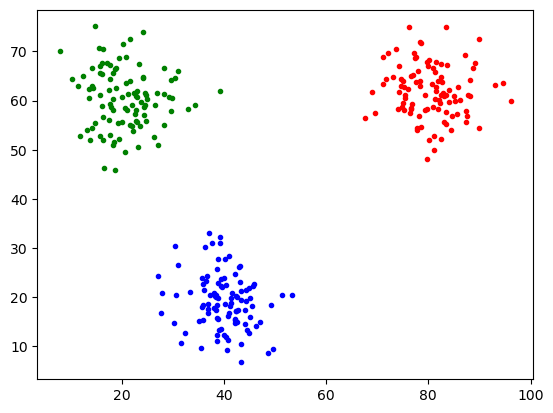

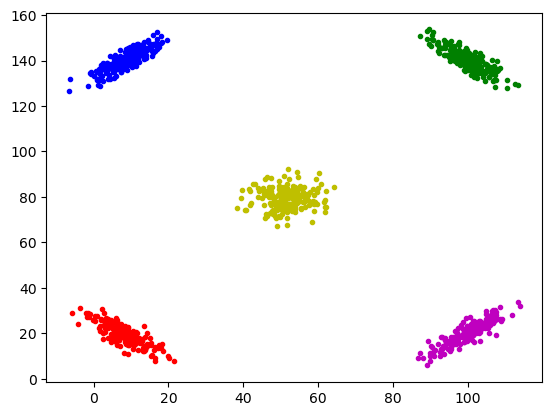

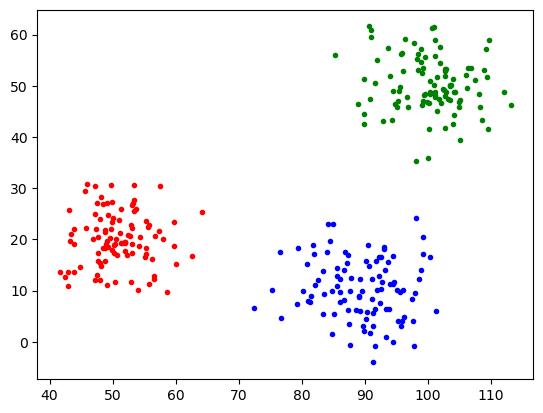

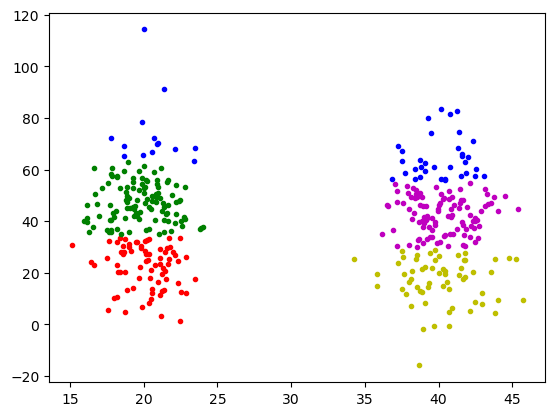

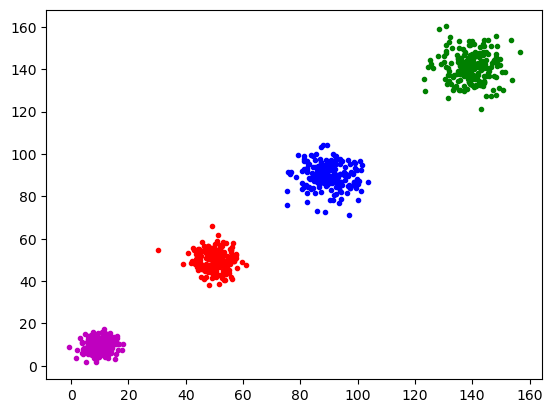

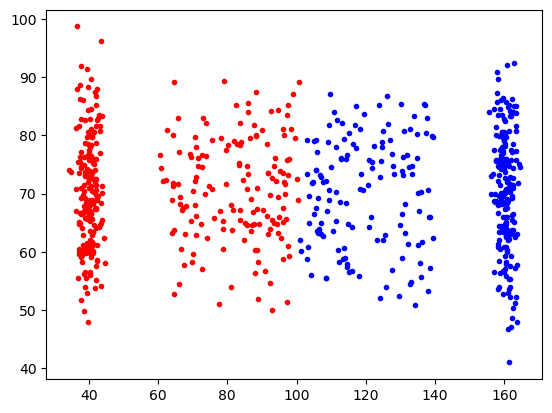

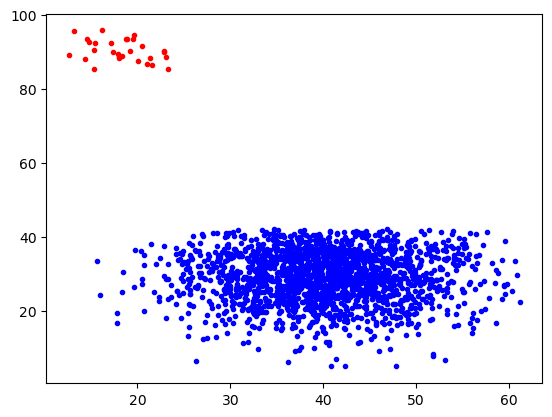

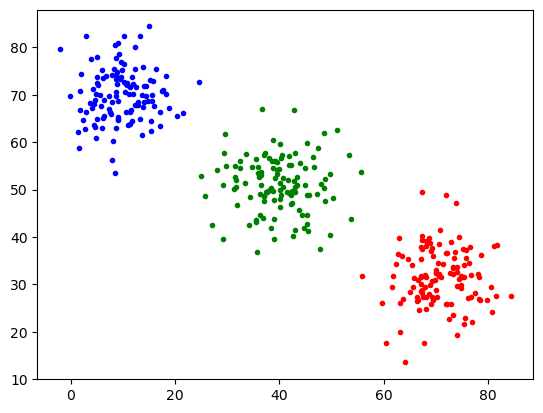

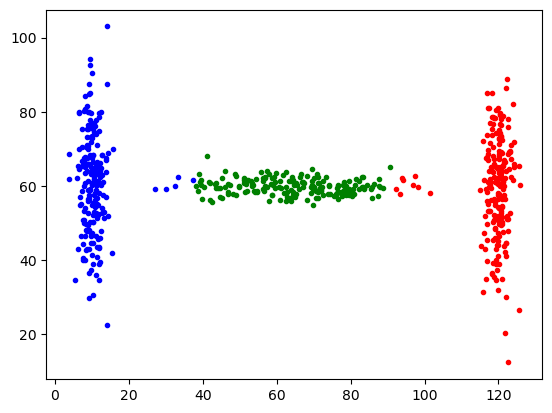

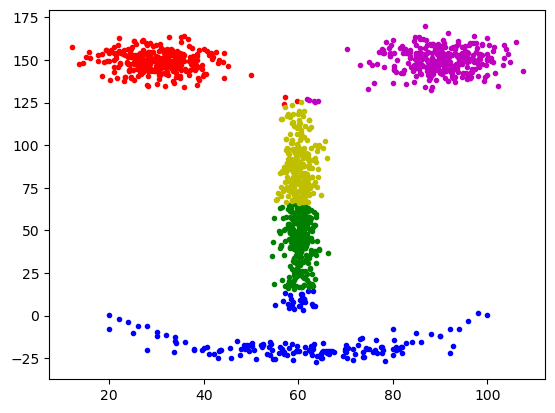

In [4]:
data = load_data()
all_figs = test_kmeans()

In [16]:
%matplotlib inline

not_natural = [3,5,8,9]
axes, figs = [all_figs[n].axes[0] for n in not_natural], [all_figs[n] for n in not_natural]

for f in figs:
    f.texts = []

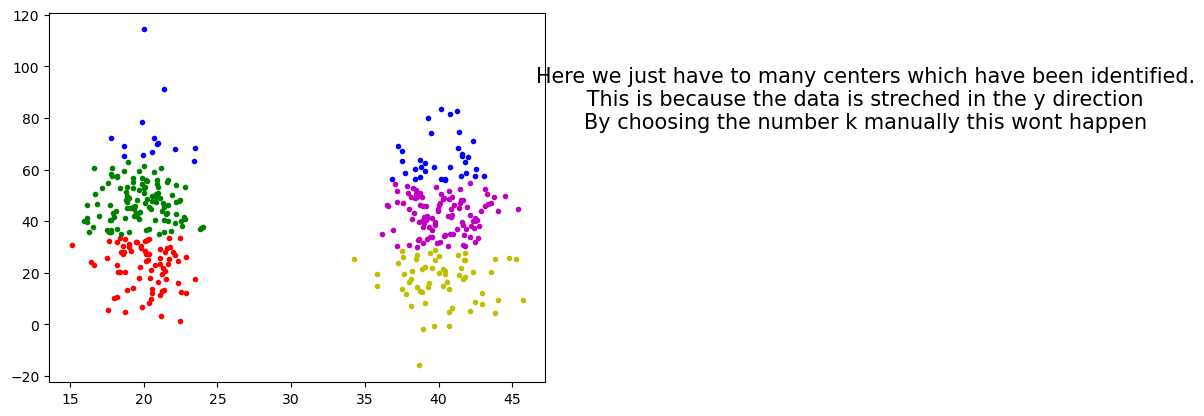

In [6]:
figs[0].text(1.4, 0.7, 
         'Here we just have to many centers which have been identified.\n '\
         'This is because the data is streched in the y direction \n' \
         'By choosing the number k manually this wont happen', 
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[0]

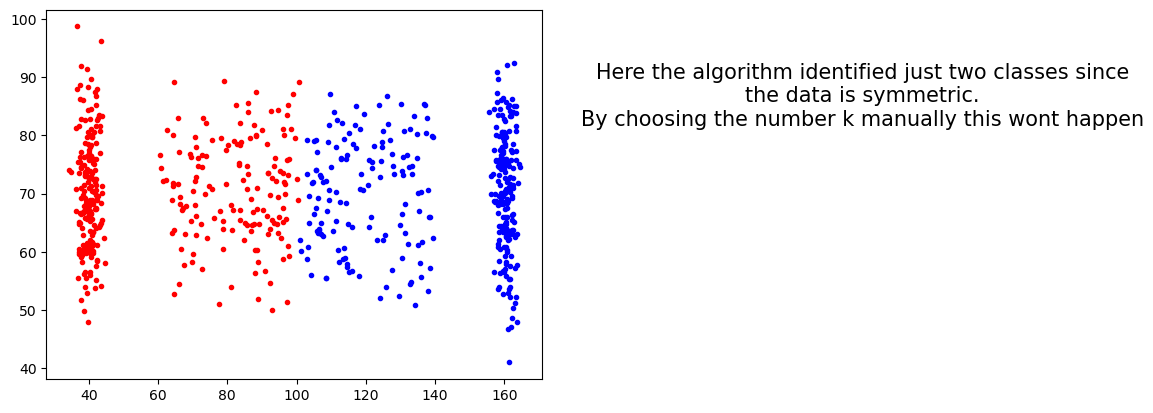

In [7]:
figs[1].text(1.4, 0.7, 
         'Here the algorithm identified just two classes since\nthe data is symmetric.\nBy choosing the number k manually' \
             ' this wont happen',
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[1]

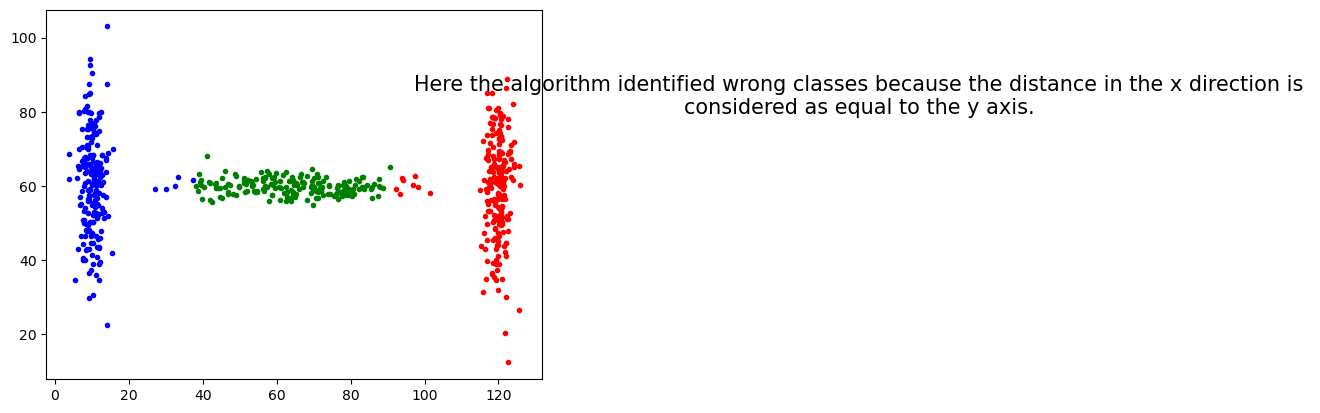

In [8]:
figs[2].text(1.4, 0.7, 
         'Here the algorithm identified wrong classes because the distance in the x direction is \n'
             'considered as equal to the y axis. ', \
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[2]

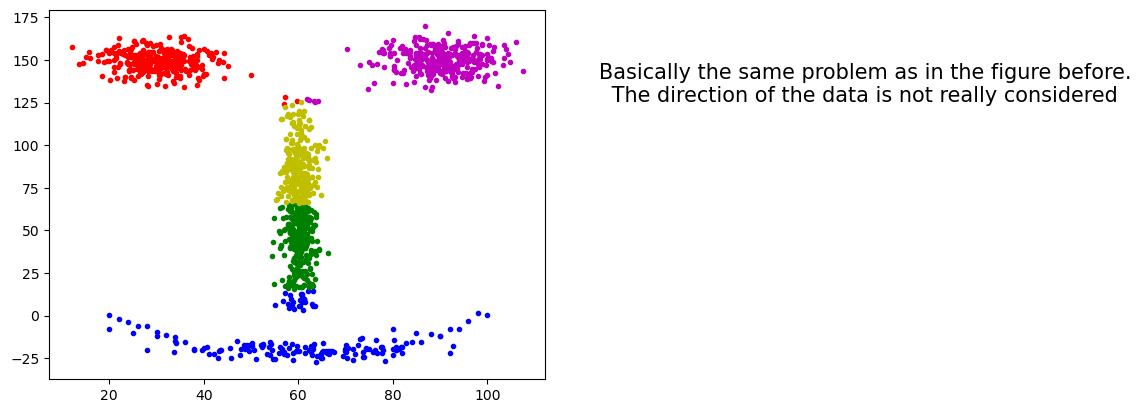

In [9]:
figs[3].texts = []
figs[3].text(1.4, 0.7, 
         'Basically the same problem as in the figure before.\n '\
             'The direction of the data is not really considered \n', \
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[3]

# Task 3 & 4

/Users/albert/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/albert/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/albert/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


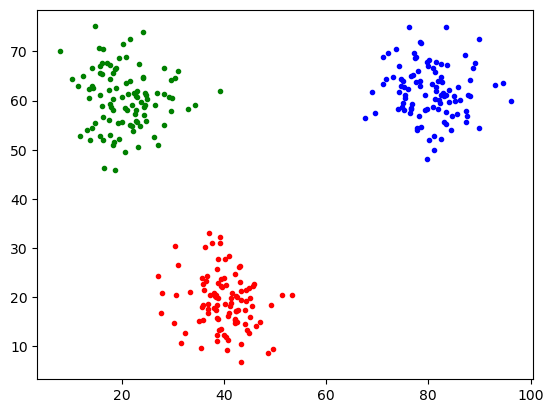

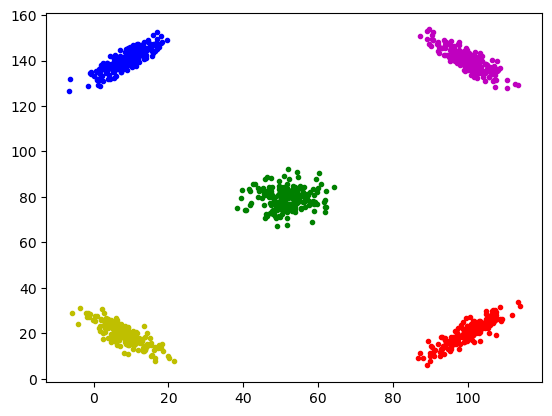

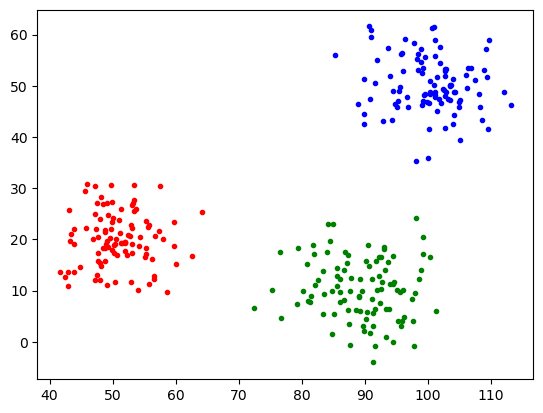

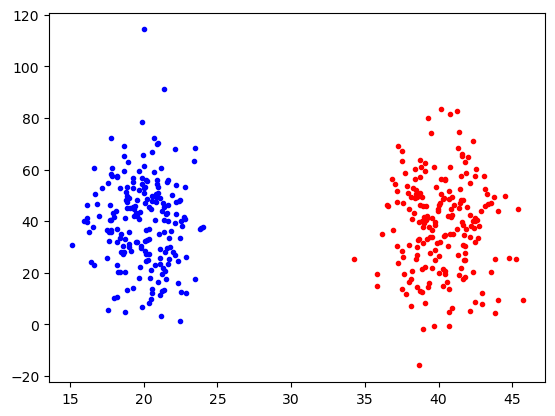

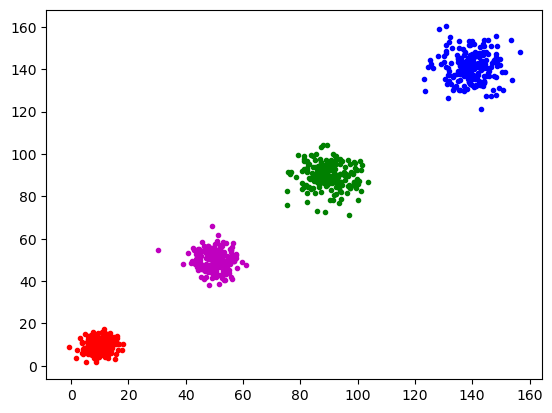

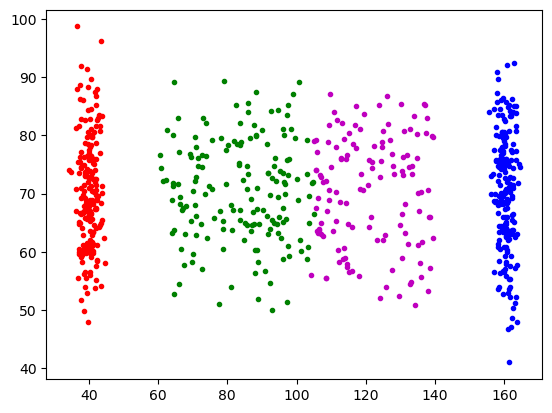

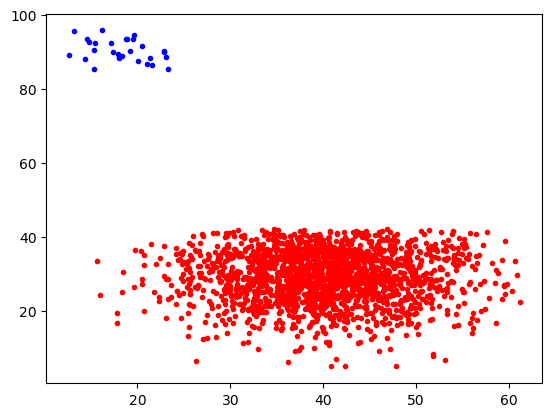

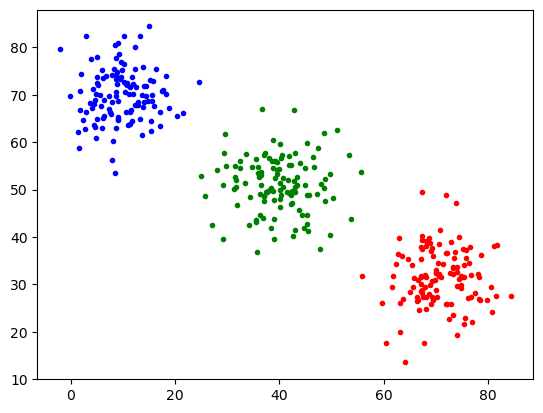

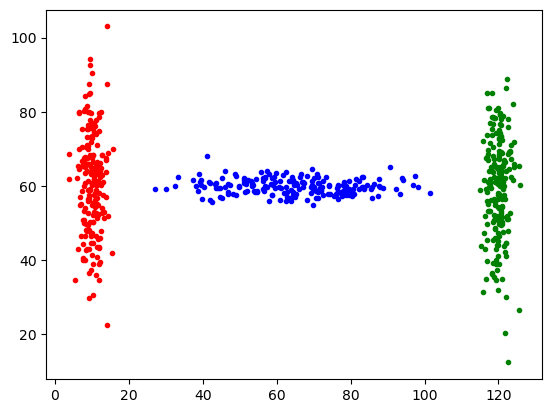

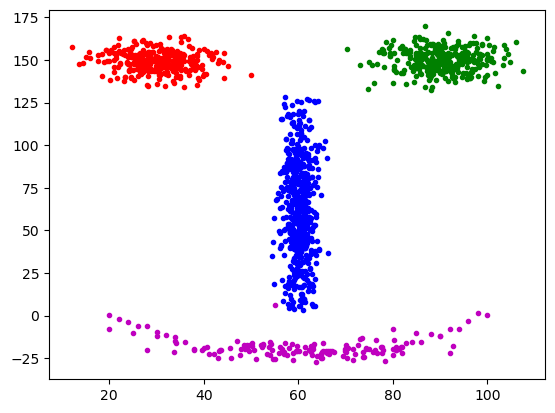

In [17]:
from sklearn.mixture import BayesianGaussianMixture

def cluster_bayesian(data):

    N, d = data.shape
    alpha = np.ones((N, 4))             # alpha[:, i] assignment when number
                                        # of clusters is i+2
    silhouetteValue = np.zeros((4,))    # silhoutteValue[i]: silhouette value
                                        # for alpha(:,i)
    for k in range(4):
        # BayesianGaussianMixture (n_components=k).fit (data)
        # to determine the parameters pi, Ci, S; for each i, corresponding to a
        # maximum likelihood estimation for the given data and the required number k of clusters.
        bayesian = BayesianGaussianMixture(n_components=k+2).fit(data)
        # Determines the clustering based on the distribution computed above,
        # where a is the cluster index vector.
        alpha[:, k] = bayesian.predict(data)
        silhouetteValue[k] = silhouette_score(data, alpha[:, k])

    i = silhouetteValue.argmax()        # finding index for optimal silhouette

    alphaOpt = alpha[:, i]

    return alphaOpt


def test_bayesian():
    plt.close('all')
    dictData = load_data()
    figures = []

    for k in range(10):
        dataString = 'data{:d}'.format(k+1)
        data = dictData[dataString]
        alphaOpt = cluster_bayesian(data)
        figures.append(plot_clusters(data, alphaOpt))

    return figures

bayesian_figs = test_bayesian()    

In [18]:
not_natural = [3,5,8,9]
axes, figs = [bayesian_figs[n].axes[0] for n in not_natural], [bayesian_figs[n] for n in not_natural]

for f in figs:
    f.texts = []

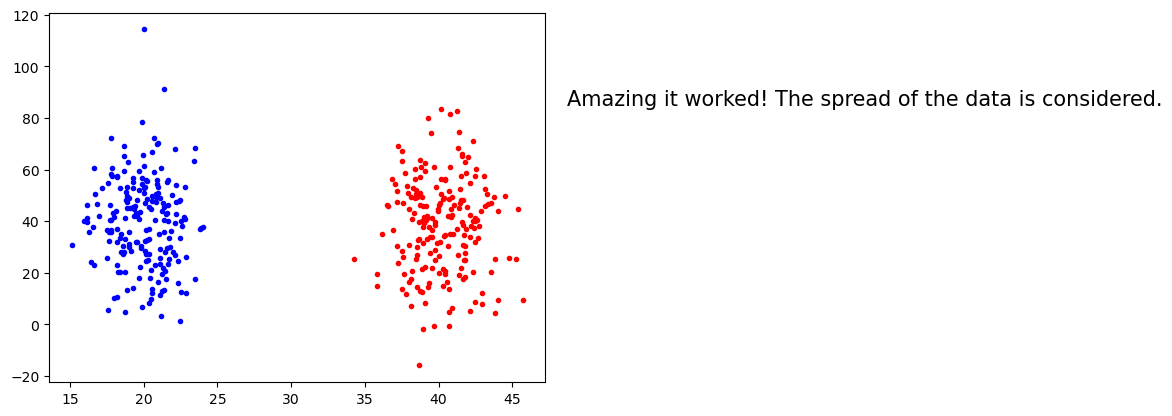

In [19]:
figs[0].text(1.4, 0.7, 
         'Amazing it worked! The spread of the data is considered.', 
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[0]

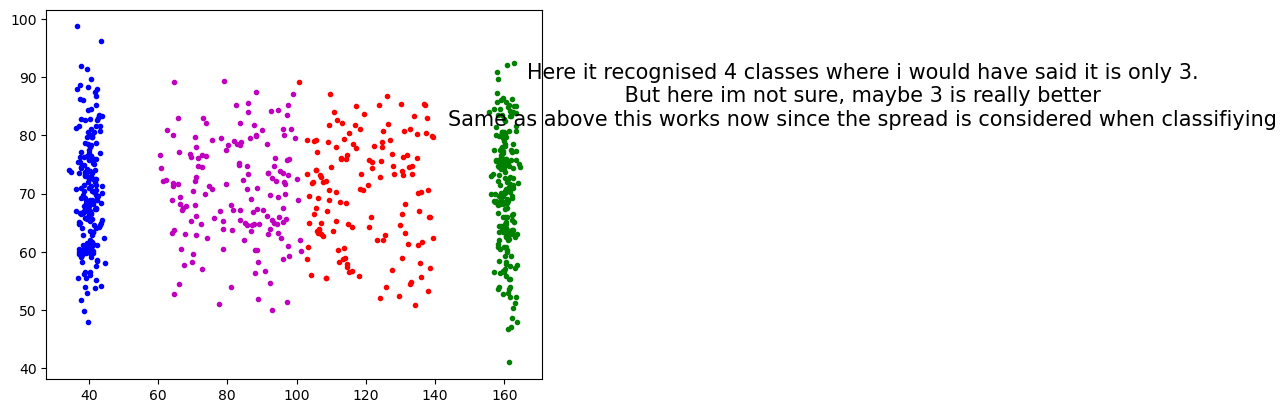

In [13]:
figs[1].text(1.4, 0.7, 
         'Here it recognised 4 classes where i would have said it is only 3.\n '\
             'But here im not sure, maybe 3 is really better \n' \
         'Same as above this works now since the spread is considered when classifiying', 
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[1]

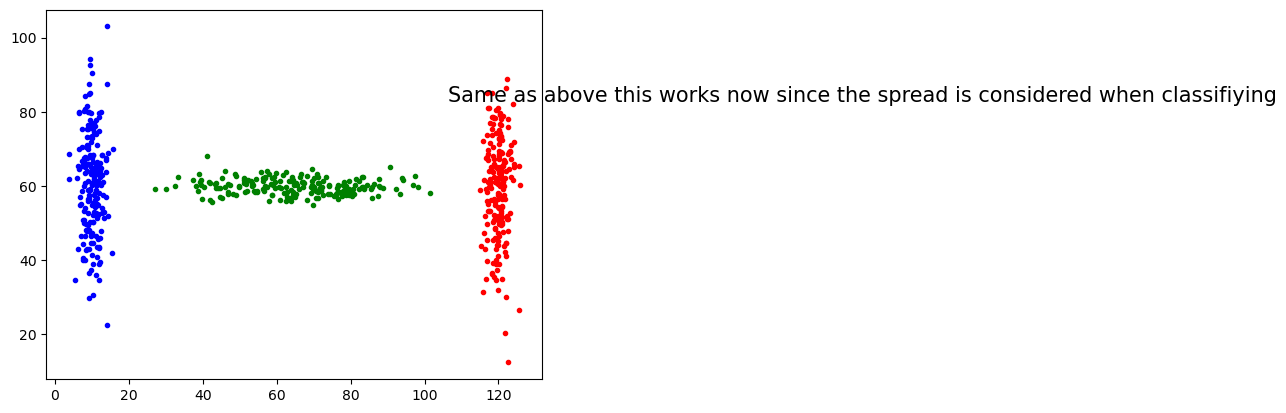

In [14]:
figs[2].text(1.4, 0.7, 
         'Same as above this works now since the spread is considered when classifiying', 
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[2]

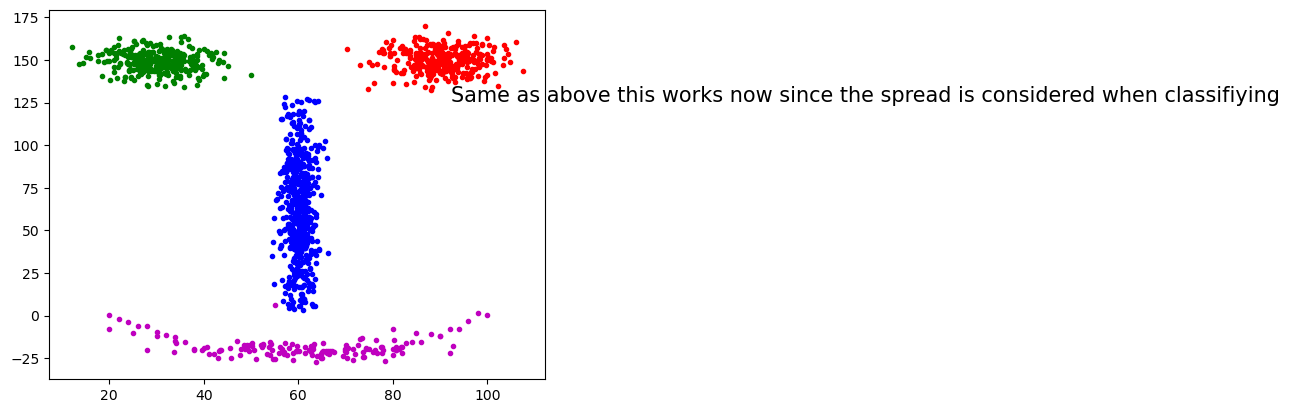

In [15]:
figs[3].text(1.4, 0.7, 
         'Same as above this works now since the spread is considered when classifiying', 
         fontsize = 15,
         color = "black",
         ha='center', va='center'
         )
figs[3]